In [1]:
from pyopenms import *
enter = []
seq =""
f=FASTAFile()

f.load("human2.fasta",enter)
for i in enter:
    seq=seq+i.sequence
dig = ProteaseDigestion()
dig.getEnzymeName() 
bsa = AASequence.fromString(seq)
result = []
dig.digest(bsa, result)
for i in result:
   print(i.toString())

MAVMAPR
TLLLLLSGALALTQTWAGSHSMR
YFFTSVSRPGR
GEPR
FIAVGYVDDTQFVR
FDSDAASQR
MEPR
APWIEQEGPEYWDQETR
NVK
AQSQTDR
VDLGTLR
GYYNQSEAGSHTIQIMYGCDVGSDGR
FLR
GYR
QDAYDGK
DYIALNEDLR
SWTAADMAAQITK
R
K
WEAAHEAEQLR
AYLDGTCVEWLR
R
YLENGK
ETLQR
TDPPK
THMTHHPISDHEATLR
CWALGFYPAEITLTWQR
DGEDQTQDTELVETRPAGDGTFQK
WAAVVVPSGEEQR
YTCHVQHEGLPKPLTLR
WELSSQPTIPIVGIIAGLVLLGAVITGAVVAAVMWR
R
K
SSDR
K
GGSYTQAASSDSAQGSDVSLTACK
VMASCASIDIEDATQHLR
DILK
LDRPAGGPSAESPRPSSAYNGDLNGLLVPDPLCSGDSTSANK
TGLR
TMPPINLQEK
QVICLSGDDSSTCIGILAK
EVEIVASSDSSISSK
AR
GSNK
VK
IQPVAK
YDWEQK
YYYGNLIAVSNSFLAYAIR
AANNGSAMVR
VISVSTSER
TLLK
GFTGSVADLAFAHLNSPQLACLDEAGNLFVWR
LALVNGK
IQEEILVHIR
QPEGTPLNHFR
R
IIWCPFIPEESEDCCEESSPTVALLHEDR
AEVWDLDMLR
SSHSTWPVDVSQIK
QGFIVVK
GHSTCLSEGALSPDGTVLATASHDGYVK
FWQIYIEGQDEPR
CLHEWKPHDGRPLSCLLFCDNHK
K
QDPDVPFWR
FLITGADQNR
ELK
MWCTVSWTCLQTIR
FSPDIFSSVSVPPSLK
VCLDLSAEYLILSDVQR
K
VLYVMELLQNQEEGHACFSSISEFLLTHPVLSFGIQVVSR
CR
LR
HTEVLPAEEENDSLGADGTHGAGAMESAAGVLIK
LFCVHTK
ALQDVQIR
FQPQLNPDVVAPLPTHTAHEDFTFGESRPELGSEG

In [2]:
from pyopenms import *
enter = []
seq =""
f=FASTAFile()
f.load("human2.fasta",enter)
for i in enter :
    seq=seq+i.sequence
dig = ProteaseDigestion()
dig.getEnzymeName()
bsa = AASequence.fromString(seq)
result = []
dig.digest(bsa, result)
peptides = [AASequence.fromString(i.toString()) for i in result]

for peptide in peptides:
    tsg = TheoreticalSpectrumGenerator()
    theo_spectrum = MSSpectrum()
    spec1 = MSSpectrum()

    p = Param()
    p.setValue("add_b_ions", "true")
    p.setValue("add_y_ions", "true")
    p.setValue("add_losses", "true")
    p.setValue("add_metainfo", "true")
    tsg.setParameters(p)
    tsg.getSpectrum(spec1, peptide, 1, 1) 
    print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
    for ion, peak in zip(spec1.getStringDataArrays()[0], spec1):
        print(ion.decode(), "is generated at m/z", peak.getMZ())


Spectrum 1 of MAVMAPR has 29 peaks.
y1-C1H2N1O1+ is generated at m/z 131.10531384957102
y1-C1H2N2+ is generated at m/z 133.097154849571
y1-H3N1+ is generated at m/z 158.092403817671
y1+ is generated at m/z 175.118952913371
b2+ is generated at m/z 203.084875643371
y2-C1H2N1O1+ is generated at m/z 228.15807807287104
y2-C1H2N2+ is generated at m/z 230.14991907287103
y2-H3N1+ is generated at m/z 255.14516804097101
y2+ is generated at m/z 272.171717136671
y3-C1H2N1O1+ is generated at m/z 299.195192232371
y3-C1H2N2+ is generated at m/z 301.187033232371
b3+ is generated at m/z 302.153289930471
y3-H3N1+ is generated at m/z 326.18228220047104
y3+ is generated at m/z 343.208831296171
y4-C1H2N1O1+ is generated at m/z 430.235677249471
y4-C1H2N2+ is generated at m/z 432.22751824947096
b4+ is generated at m/z 433.19377494757094
y4-H3N1+ is generated at m/z 457.222767217571
y4+ is generated at m/z 474.249316313271
b5+ is generated at m/z 504.23088910707094
y5-C1H2N1O1+ is generated at m/z 529.3040915

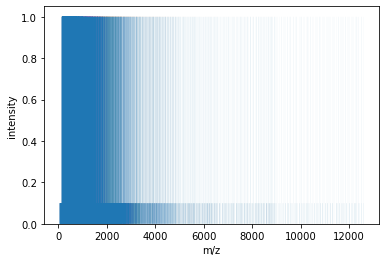

In [3]:
import numpy as np
from matplotlib import pyplot as plt
for r in result:
    peptide = AASequence.fromString(r.toString())
    tsg.getSpectrum(spec1,r,1,1)
plt.bar(spec1.get_peaks()[0], spec1.get_peaks()[1], snap=False) 
plt.xlabel("m/z")
plt.ylabel("intensity")
plt.show()

In [5]:
from pyopenms import *
exp = MSExperiment()
MzMLFile().load("Fusion_180220_40.mzML", exp)
spectra = exp.getSpectra()
observed_spectrum = spectra[0]

In [6]:
tsg = TheoreticalSpectrumGenerator()
theo_spectrum = MSSpectrum()
p = tsg.getParameters()
p.setValue("add_y_ions", "true")
p.setValue("add_b_ions", "true")
p.setValue("add_metainfo", "true")
tsg.setParameters(p)
tsg.getSpectrum(theo_spectrum, peptide, 1, 1)

40.018175498671
6934.325783934568


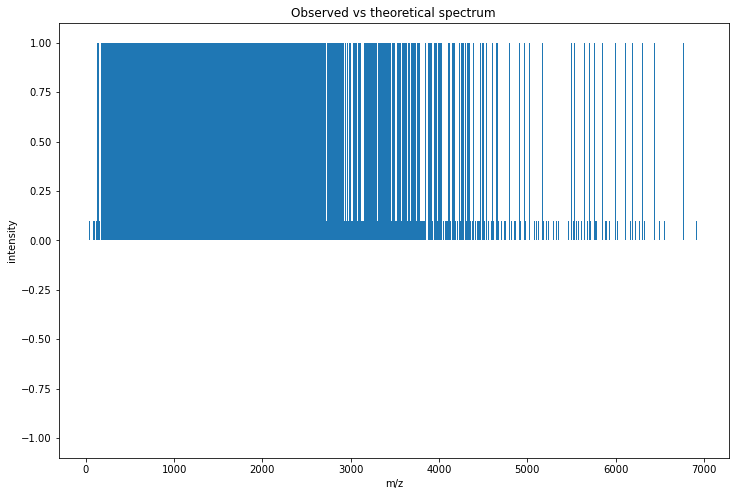

In [7]:
import numpy as np
from matplotlib import pyplot as plt

def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
    obs_int = [element / max(obs_int) for element in obs_int] 
    theo_int = [element * -1 for element in theo_int] 
    plt.figure(figsize=(12,8))
    plt.bar(obs_mz, obs_int, width = 3.0)
    plt.bar(theo_mz, theo_int, width = 3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')

obs_mz, obs_int = observed_spectrum.get_peaks()


print(min(obs_mz)) 
print(max(obs_mz)) 


theo_mz, theo_int = [], []
for mz, intensity in zip(*theo_spectrum.get_peaks()):
    if mz >= min(obs_mz) and mz <= max(obs_mz):
        theo_mz.append(mz)
        theo_int.append(intensity)

title = 'Observed vs theoretical spectrum'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)

In [11]:
alignment = []
spa = SpectrumAlignment()
p = spa.getParameters()
p.setValue("tolerance", 0.5)
p.setValue("is_relative_tolerance", "false")
spa.setParameters(p)
spa.getSpectrumAlignment(alignment, theo_spectrum, observed_spectrum)

In [9]:
print("Number of matched peaks: " + str(len(alignment)))
print("ion\ttheo. m/z\tobserved m/z")

for theo_idx, obs_idx in alignment:
    ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
    ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
    print(ion_name + "\t" + str(ion_charge) + "\t"
      + str(theo_spectrum[theo_idx].getMZ())
      + "\t" + str(observed_spectrum[obs_idx].getMZ()))

Number of matched peaks: 6
ion	theo. m/z	observed m/z
b2+	1	205.09715484957098	205.09715484957098
b3+	1	262.118618945271	262.118618945271
y2+	1	263.14239089857097	263.139020040971
y3+	1	320.16385499427093	320.16048413667096
b4+	1	393.159103962371	393.170336962371
y4+	1	467.2322692813709	467.23610942377104


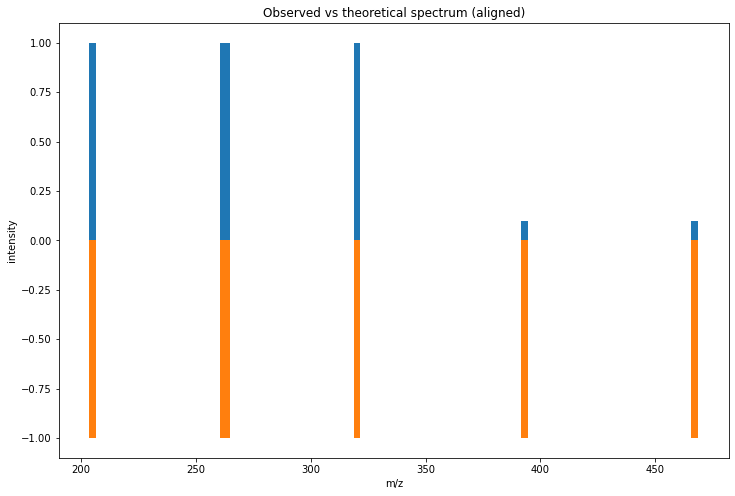

In [10]:
theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
for theo_idx, obs_idx in alignment:
    theo_mz.append(theo_spectrum[theo_idx].getMZ())
    theo_int.append(theo_spectrum[theo_idx].getIntensity())
    obs_mz.append(observed_spectrum[obs_idx].getMZ())
    obs_int.append(observed_spectrum[obs_idx].getIntensity())

title = 'Observed vs theoretical spectrum (aligned)'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)